In this article, I will explain how to develop an Automated Supervised Machine Learning Regression program, which automatically tunes the hyperparameters and prints out the final results as tables, graphs and boxplots.

I always like to keep my libraries together, hence I import all of them at once in the beginning of the code.

In [1]:
import pandas as pd
import numpy as np
import statistics
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Lets import our dataset and define the features and the predictors.

In [2]:
#Importing the datasets-------------------------------------------------------
print ("Importing datasets")
df = pd.read_csv('data.csv')  

Importing datasets


Let's take a look at how the dataset looks. I like using df.describe() function to have some statistics about each column.

In [3]:
df.describe()

,A,B,C,D
count,999.000000,999.000000,999.000000,999.000000
mean,25.330330,25.052052,24.791792,24.837838
std,14.690016,14.494809,14.485799,15.160588
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,13.000000,12.000000,12.000000
50%,25.000000,25.000000,24.000000,25.000000
75%,38.000000,37.000000,37.000000,38.000000
max,50.000000,50.000000,50.000000,50.000000


As illustrated, this is a dataset with random points, which has a maximum value of 50 and minimum 0 in all columns. This is a 999x4 data. 

Let's define the features as X and the column we want to predict (column D) as y. 

In [4]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,3].values

This defines X as all the values except the last column (columns A,B and C), and y as the last column (column numbers start from zero, hence: 0 - A, 1 - B, 2 - C, 3 - D).

For some algorithms we might want to use X as preprocessed (normalized) values (X2). This mostly provides higher accuracies for algorithms such as Multi Layer Perceptron (MLP) or Support Vector Machines (SVM). Hence, for the rest of the program, X2 will be used for non-linear ML algorithms such as random forest, XGBoost, MLP, SVM. However, X will be used for polynomial regressions and linear regression to evaluate the regression constants easier.

In [5]:
X2 = preprocessing.scale(X)

We have to split our dataset as train and test data. For this we can use train_test_split by sklearn.model_selection. We will do this for both X and X2. Test size of 0.20 means that 20% of the data will be used as test data and 80% of the data will be used for training.

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20)
X_train2, X_test2, y_train2, y_test2= train_test_split(X2,y,test_size = 0.20)


We might not always want to tune the parameters of models, or only tune for some models. For this I have defined basic inputs. When they are set to "yes", the program will perform the tuning.

In [7]:
#Inputs------------------------------------------------------------------------
randomforestparametertuning = "yes"
XGboostparametertuning = "yes"
SVMparametertuning ="yes"
MLPparametertuning ="yes"

The first one is training, testing and tuning the random forest regression. The values of param_grid might be updated regarding the problem (i.e., some problems might require higher values of n_estimators, while some might require lower ranges).

In [8]:
if randomforestparametertuning == "yes":
    print ("Performing gridsearch in random forest")

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True,False],
        'max_depth': [40, 50, 60],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1,2,3,],
        'min_samples_split': [3,4,5],
        'n_estimators': [100, 200, 300]
    }
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search_RF = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_RF.fit(X_train2, y_train2)

Performing gridsearch in random forest
Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  4.0min finished


The second one is training, testing and tuning the XGBoost regression. The values of grid might be updated regarding the problem (i.e., some problems might require higher values of n_estimators, while some might require lower ranges).

In [9]:
#XGBoost Parameter Tuning------------------------------------------------------
if XGboostparametertuning == "yes":
    print("XGBoost parameter tuning")
    # Create the parameter grid based on the results of random search 
    grid = {'colsample_bytree': [0.9,0.8,0.7],
                    'gamma': [2,3,4,5],
                    'learning_rate': [0.1,0.2,0.3],
                    'max_depth': [8,9,10,11,12],
                    'n_estimators': [10,15,20,25],
                    'subsample': [0.8,0.9,1],
                    'reg_alpha': [15,16,17,18,19,20],
                    'min_child_weight':[3,4,5]}

    # Create a based model
    XGB = XGBRegressor()
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_XGB.fit(X_train2, y_train2)

XGBoost parameter tuning
Fitting 3 folds for each of 38880 candidates, totalling 116640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1832 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 9608 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 15448 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 22568 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 31000 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 38912 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 49936 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 62240 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 75856 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 81808 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 89692 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 98436 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 10783

[22:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The third one is training, testing and tuning the SVM regression. The values of C_range or gamma_range might be updated regarding the problem.

In [10]:
#SVM Parameter Tuning----------------------------------------------------------
if SVMparametertuning == "yes":
    print("SVM parameter tuning")

    C_range = 10. ** np.arange(-3, 6)
    gamma_range = 10. ** np.arange(-5, 2)
    param_grid = dict(gamma=gamma_range, C=C_range)
    svr_rbf = SVR()
    # Instantiate the grid search model
    grid_search_svm = GridSearchCV(estimator = svr_rbf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search_svm.fit(X_train2, y_train2)

SVM parameter tuning
Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:  1.7min finished


The fourth one is training, testing and tuning the MLP algorithm. The values of param_grid might be updated regarding the problem.

In [11]:
if MLPparametertuning == "yes":
    print("SVM parameter tuning")

    param_grid = {
        'hidden_layer_sizes': [10,20,30,40,50,60,70,80,90,100],
        'activation': ['identity','logistic','tanh','relu'],
        'solver': ['lbfgs', 'sgd','adam'],
        'learning_rate': ['constant','invscaling','adaptive']}
    MLP = MLPRegressor()
    # Instantiate the grid search model
    grid_search_MLP = GridSearchCV(estimator = MLP, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the grid search to the data
    grid_search_MLP.fit(X_train2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


SVM parameter tuning
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The below commands provide a summary of the best parameters obtained from the GridSearch of all these four algortihms.

In [12]:
#Summary of the tuning parameters----------------------------------------------
print("Grid Search Best Parameters for Random Forest Regression")
print (grid_search_RF.best_params_)
print("Grid Search Best Parameters for XGBoost")
print (grid_search_XGB.best_params_)    
print("Grid Search Best Parameters for SVM")
print (grid_search_svm.best_params_)
print("Grid Search Best Parameters for MLP")
print (grid_search_MLP.best_params_)

Grid Search Best Parameters for Random Forest Regression
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Grid Search Best Parameters for XGBoost
{'colsample_bytree': 0.9, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 11, 'min_child_weight': 5, 'n_estimators': 15, 'reg_alpha': 16, 'subsample': 0.8}
Grid Search Best Parameters for SVM
{'C': 1.0, 'gamma': 10.0}
Grid Search Best Parameters for MLP
{'activation': 'tanh', 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'solver': 'sgd'}


Next thing, we will be fitting 9 different algortihms to our data to see which one performs the best. These are namely: multi linear regression, ridge regression, lasso regression, polynomial regression (degree=2), polynomial regression (degree=3), random forest regression (with the best parameters obtained from GridSearch), XGBoost regression (with the best parameters obtained from GridSearch), SVM regression (with the best parameters obtained from GridSearch) and MLP (with the best parameters obtained from GridSearch).

In [13]:
#Fitting multi linear regression to data---------------------------------------
print ("Fit multilinear regression")
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Fitting ridge regression to data----------------------------------------------
print ("Fit ridge regression")
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)

#Fitting LASSO regression to data----------------------------------------------
print ("Fit Lasso regression")
lassoreg = Lasso(alpha=0.01, max_iter=10e5)
lassoreg.fit(X_train, y_train)

#Polynomial regression 2 degrees
print ("Fit polynomial regression degree=2")
poly2 = PolynomialFeatures(degree=2)
X_train_trans = poly2.fit_transform(X_train)
polyreg2 = linear_model.LinearRegression()
p=polyreg2.fit(X_train_trans,y_train)
poly2_coef = polyreg2.coef_

#Polynomial regression 3 degrees
print ("Fit polynomial regression degree=3")
poly3 = PolynomialFeatures(degree=3)
X_train_trans = poly3.fit_transform(X_train)
polyreg3 = linear_model.LinearRegression()
polyreg3.fit(X_train_trans,y_train)
poly3_coef = polyreg3.coef_

#Fitting random forest regression to data--------------------------------------
print ("Fit random forest regression")
randreg = RandomForestRegressor(**grid_search_RF.best_params_)
randreg.fit(X_train2,y_train2)

#Fitting XGboost regression to data--------------------------------------------
print ("Fit XGBoost regression")
XGBreg = XGBRegressor(**grid_search_XGB.best_params_)
XGBreg.fit(X_train2, y_train2)

#Support Vector Machines-------------------------------------------------------
svr_rbf = SVR(**grid_search_svm.best_params_)
print ("Fit SVR RBF regression")
svr_rbf.fit(X_train2, y_train2)

#MLP Regressor-----------------------------------------------------------------
MLP = MLPRegressor(**grid_search_MLP.best_params_)
print ("Fit Multi-layer Perceptron regressor")
MLP.fit(X_train2, y_train2)

Fit multilinear regression
Fit ridge regression
Fit Lasso regression
Fit polynomial regression degree=2
Fit polynomial regression degree=3
Fit random forest regression
Fit XGBoost regression
[22:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit SVR RBF regression
Fit Multi-layer Perceptron regressor


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

For the error analysis, we are using four different statistics. The first one is r_score, which is the r2 (coefficient of determination) of the test data and the predicted data. The second is MAE = Mean Absolute Error, the third one is MSE = Mean Squared Error and the third one is MAPE = Mean Absolute Percentage Error. The MAE and MSE calculations come directly from sklearn.metrics / mean_absolute_error and mean_squared_error. For the r_score and MAPE, we are defining below functions.

In [14]:
#Define the missing sklearn.metrics parameter of mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.abs((y_true - y_pred) / y_true)) * 100

def r_score(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    residuals = y_true- y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true-np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)    
    return r_squared

Now that the error statistics are defined, lets predict the predicted values by the algorithm and calculate the errors.

In [15]:
y_predicted_RF = randreg.predict(X_test2)
y_predicted_LREG = linreg.predict(X_test)
y_predicted_RIDGE = ridgeReg.predict(X_test)
y_predicted_XGB = XGBreg.predict(X_test2)
y_predicted_LASSO = lassoreg.predict(X_test)
y_predicted_svr_rbf = svr_rbf.predict(X_test2)
y_predicted_MLP = MLP.predict(X_test2)
y_predicted_PREG2 = polyreg2.predict(poly2.fit_transform(X_test))
y_predicted_PREG3 = polyreg3.predict(poly3.fit_transform(X_test))

r_RF=  r_score(y_test2, y_predicted_RF)
MAE_RF = mean_absolute_error(y_test2, y_predicted_RF)
MSE_RF = mean_squared_error(y_test2, y_predicted_RF)
MAPE_RF = mean_absolute_percentage_error(y_test2, y_predicted_RF)

r_LREG=  r_score(y_test, y_predicted_LREG)
MAE_LREG = mean_absolute_error(y_test, y_predicted_LREG)
MSE_LREG = mean_squared_error(y_test, y_predicted_LREG)
MAPE_LREG = mean_absolute_percentage_error(y_test, y_predicted_LREG)

r_RIDGE=  r_score(y_test, y_predicted_RIDGE)
MAE_RIDGE = mean_absolute_error(y_test, y_predicted_RIDGE)
MSE_RIDGE = mean_squared_error(y_test, y_predicted_RIDGE)
MAPE_RIDGE = mean_absolute_percentage_error(y_test, y_predicted_RIDGE)

r_XGB=  r_score(y_test2, y_predicted_XGB)
MAE_XGB = mean_absolute_error(y_test2, y_predicted_XGB)
MSE_XGB = mean_squared_error(y_test2, y_predicted_XGB)
MAPE_XGB = mean_absolute_percentage_error(y_test2, y_predicted_XGB)

r_LASSO=  r_score(y_test, y_predicted_LASSO)
MAE_LASSO = mean_absolute_error(y_test, y_predicted_LASSO)
MSE_LASSO = mean_squared_error(y_test, y_predicted_LASSO)
MAPE_LASSO = mean_absolute_percentage_error(y_test, y_predicted_LASSO)

r_svr_rbf=  r_score(y_test2, y_predicted_svr_rbf)
MAE_svr_rbf = mean_absolute_error(y_test2, y_predicted_svr_rbf)
MSE_svr_rbf = mean_squared_error(y_test2, y_predicted_svr_rbf)
MAPE_svr_rbf = mean_absolute_percentage_error(y_test2, y_predicted_svr_rbf)

r_MLP=  r_score(y_test2, y_predicted_MLP)
MAE_MLP = mean_absolute_error(y_test2, y_predicted_MLP)
MSE_MLP = mean_squared_error(y_test2, y_predicted_MLP)
MAPE_MLP = mean_absolute_percentage_error(y_test2, y_predicted_MLP)

r_PREG2= r_score(y_test, y_predicted_PREG2)
MAE_PREG2= mean_absolute_error(y_test, y_predicted_PREG2)
MSE_PREG2= mean_squared_error(y_test, y_predicted_PREG2)
MAPE_PREG2= np.mean(mean_absolute_percentage_error(y_test, y_predicted_PREG2))

r_PREG3= r_score(y_test, y_predicted_PREG3)
MAE_PREG3= mean_absolute_error(y_test, y_predicted_PREG3)
MSE_PREG3= mean_squared_error(y_test, y_predicted_PREG3)
MAPE_PREG3= np.mean(mean_absolute_percentage_error(y_test, y_predicted_PREG3))

errors = [{'Model Name': 'Random Forest Regression', 'R2': r_RF, 'MAE': MAE_RF, 'MSE': MSE_RF, 'MAPE (%)': np.mean(MAPE_RF), 'Median Error (%)': statistics.median(MAPE_RF)},
          {'Model Name': 'Linear Regression', 'R2': r_LREG, 'MAE': MAE_LREG, 'MSE': MSE_LREG, 'MAPE (%)': np.mean(MAPE_LREG), 'Median Error (%)': statistics.median(MAPE_LREG)},
          {'Model Name': 'Ridge Regression', 'R2': r_RIDGE, 'MAE': MAE_RIDGE, 'MSE': MSE_RIDGE, 'MAPE (%)': np.mean(MAPE_RIDGE), 'Median Error (%)': statistics.median(MAPE_RIDGE)},
          {'Model Name': 'XGBoost Regression', 'R2': r_XGB, 'MAE': MAE_XGB, 'MSE': MSE_XGB, 'MAPE (%)': np.mean(MAPE_XGB), 'Median Error (%)': statistics.median(MAPE_XGB)},
          {'Model Name': 'Lasso Regression', 'R2': r_LASSO, 'MAE': MAE_LASSO, 'MSE': MSE_LASSO, 'MAPE (%)': np.mean(MAPE_LASSO), 'Median Error (%)': statistics.median(MAPE_LASSO)},
          {'Model Name': 'Support Vector Machine', 'R2': r_svr_rbf, 'MAE': MAE_svr_rbf, 'MSE': MSE_svr_rbf, 'MAPE (%)': np.mean(MAPE_svr_rbf), 'Median Error (%)': statistics.median(MAPE_svr_rbf)},
          {'Model Name': 'Multi-layer Perceptron', 'R2': r_MLP, 'MAE': MAE_MLP, 'MSE': MSE_MLP, 'MAPE (%)': np.mean(MAPE_MLP), 'Median Error (%)': statistics.median(MAPE_MLP)},
          {'Model Name': '2nd Polynomial Regression', 'R2': r_PREG2 , 'MAE': MAE_PREG2 , 'MSE': MSE_PREG2 , 'MAPE (%)': MAPE_PREG2},
          {'Model Name': '3rd Polynomial Regression', 'R2': r_PREG3 , 'MAE': MAE_PREG3 , 'MSE': MSE_PREG3 , 'MAPE (%)': MAPE_PREG3}]

df_estimationerrors = pd.DataFrame(errors)
df_estimationerrors= df_estimationerrors.sort_values(by=['Median Error (%)'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt

Let's look at how our error table looks like:

In [16]:
print(df_estimationerrors)

                  Model Name        R2        MAE         MSE  MAPE (%)  \
1          Linear Regression -0.020588  12.053405  201.081182       inf   
4           Lasso Regression -0.020576  12.053432  201.078812       inf   
2           Ridge Regression -0.019932  12.052451  200.951796       inf   
6     Multi-layer Perceptron -0.033154  13.295343  235.210240       inf   
0   Random Forest Regression -0.112244  13.626612  253.216151       inf   
5     Support Vector Machine -0.017291  13.176381  231.599012       inf   
3         XGBoost Regression -0.134958  13.669333  258.387192       inf   
7  2nd Polynomial Regression -0.016995  12.045494  200.373243       inf   
8  3rd Polynomial Regression  0.008126  11.821172  195.423782       inf   

   Median Error (%)  
1         39.029110  
4         39.031660  
2         39.084200  
6         42.218712  
0         43.739991  
5         44.800299  
3         45.744380  
7               NaN  
8               NaN  


We can also visualize our erros by BoxPlots:

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


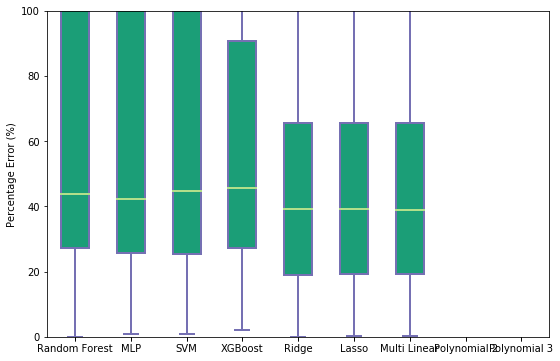

In [17]:
#Boxplot 
import matplotlib.pyplot as plt 

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot = [MAPE_RF,MAPE_MLP,MAPE_svr_rbf,MAPE_XGB,MAPE_RIDGE,MAPE_LASSO,MAPE_LREG,MAPE_PREG2,MAPE_PREG3]

# Create the boxplot
bp = ax.boxplot(data_to_plot)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
              
## Custom x-axis labels
ax.set_xticklabels(['Random Forest',  'MLP','SVM', 'XGBoost','Ridge','Lasso','Multi Linear','Polynomial 2','Polynomial 3'])
ax.set_ylim(0,100)
ax.set_ylabel("Percentage Error (%)")
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.savefig('boxplots.png', dpi=1000)
fig.savefig('boxplots.pdf')

Moreover, perform a principal component analysis (PCA) using the random forest regression results:

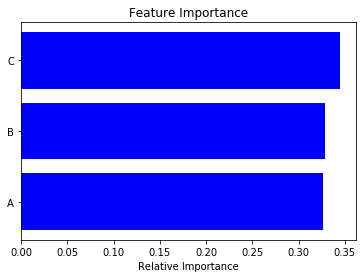

In [18]:
#Principal Component Analysis
features = df.columns[:-1]
importances = randreg.feature_importances_
indices = np.argsort(importances)
plt.figure(3) #the axis number
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('Feature Importance.png', 
              bbox_inches='tight', dpi = 500,figsize=(8,6))

df_estimationerrors.to_csv("errors.csv")